# Examples of Nonlinear Behaviors


In [1]:
using PyPlot

# Mulitple Equilibrium

In this example we will examine the equation:

$$ \dot{x} = -x + x^2 $$ 

If we linearize it around a point x_0, we get: 

$$ x(t) = x_0e^{-t} $$

The exact solution to this equation is given by:
$$ x(t) = \frac{x_0e^{-t}}{1 - x_0 + x_0e^{-t}}$$ 

Let's take a look at these:

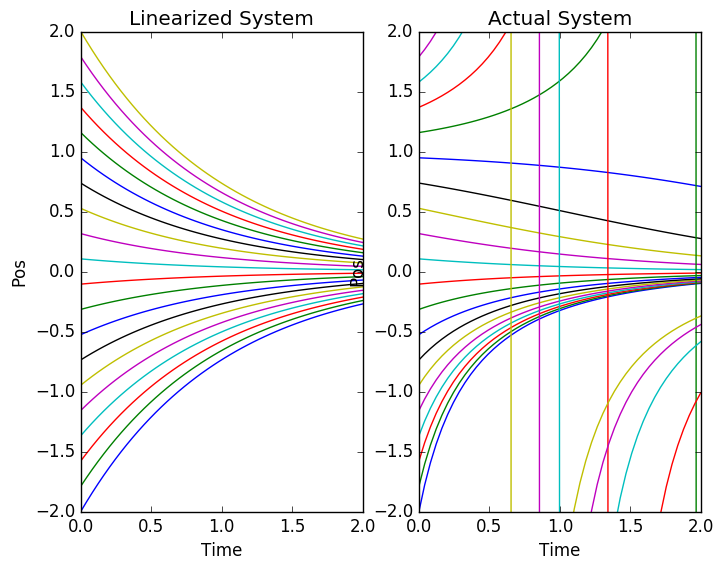

In [2]:
# Initial Conditions and time
x_in = linspace(-2,2,20);
t_span  = linspace(0,2);

# Dynamics of each system
xl = [x0*exp(-t) for x0 = x_in, t = t_span];
xn = [x0*exp(-t)/(1 - x0 + x0*exp(-t)) for x0 = x_in, t = t_span];

# println(size(xl));
# println(size(xn));

# Plot each
figure(1);
subplot(1,2,1);
title("Linearized System"); xlabel("Time"); ylabel("Pos")
plot(t_span,xl');

ax = subplot(1,2,2);
title("Actual System"); xlabel("Time"); ylabel("Pos")
ax[:set_ylim](ymin=-2, ymax=2);
ax[:set_xlim](xmin=0, xmax=2);
plot(t_span,xn');

# Limit Cycles

An example of a limit cycle is the Van der Pol Oscillator. The equation is given by:

$$ m\ddot{x} + 2c(x^2 - 1)\dot{x} + kx = 0 $$

For large values of x, the damper will remove energy from the system, and for small values of x it adds energy to the system. This means that for a variety of initial conditions, it will not converge to a single value, it will tend to a stable oscillation.

Let's take a look:

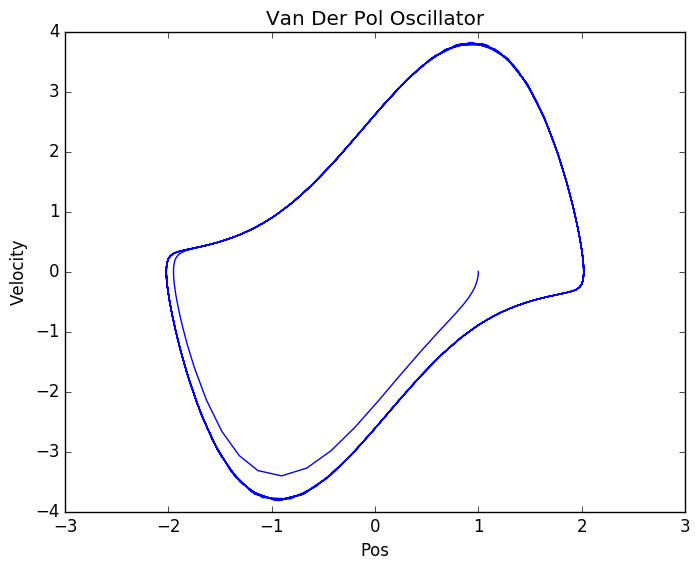

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe303152790>

In [4]:
using DifferentialEquations

# Parameters
m = 1.0 
c = 1.0 
k = 1.0

# State vector z = [xdot; x]
function van_der_pol(t,z,dz)
 dz[1] = -(k/m)*z[2] - 2*(c/m)*(z[2]^2 - 1)*z[1]
 dz[2] = z[1]
end

z0    = [0.0, 1]
tspan = (0.0,50.0)
prob  = ODEProblem(van_der_pol,z0,tspan)

# Solve state space
sol   = solve(prob,reltol=1e-8,abstol=1e-8)

# Grab State solutions
len   = size(sol.u)

t     = sol.t
x     = [sol.u[i][2] for i in 1:len[1]]
x_dot = [sol.u[i][1] for i in 1:len[1]]

# Plot each 
figure(1);
title("Van Der Pol Oscillator"); xlabel("Pos"); ylabel("Velocity");
plot(x, x_dot)



